Reference

https://www.kaggle.com/code/mahmoudlimam/dbscan-clustering-tutorial/notebook

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('./kc_house_data.csv')

In [24]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
data.drop(["date", "id", "zipcode", "condition", "lat", "long"], axis=1, inplace=True)

In [27]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,1800,7503


In [28]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


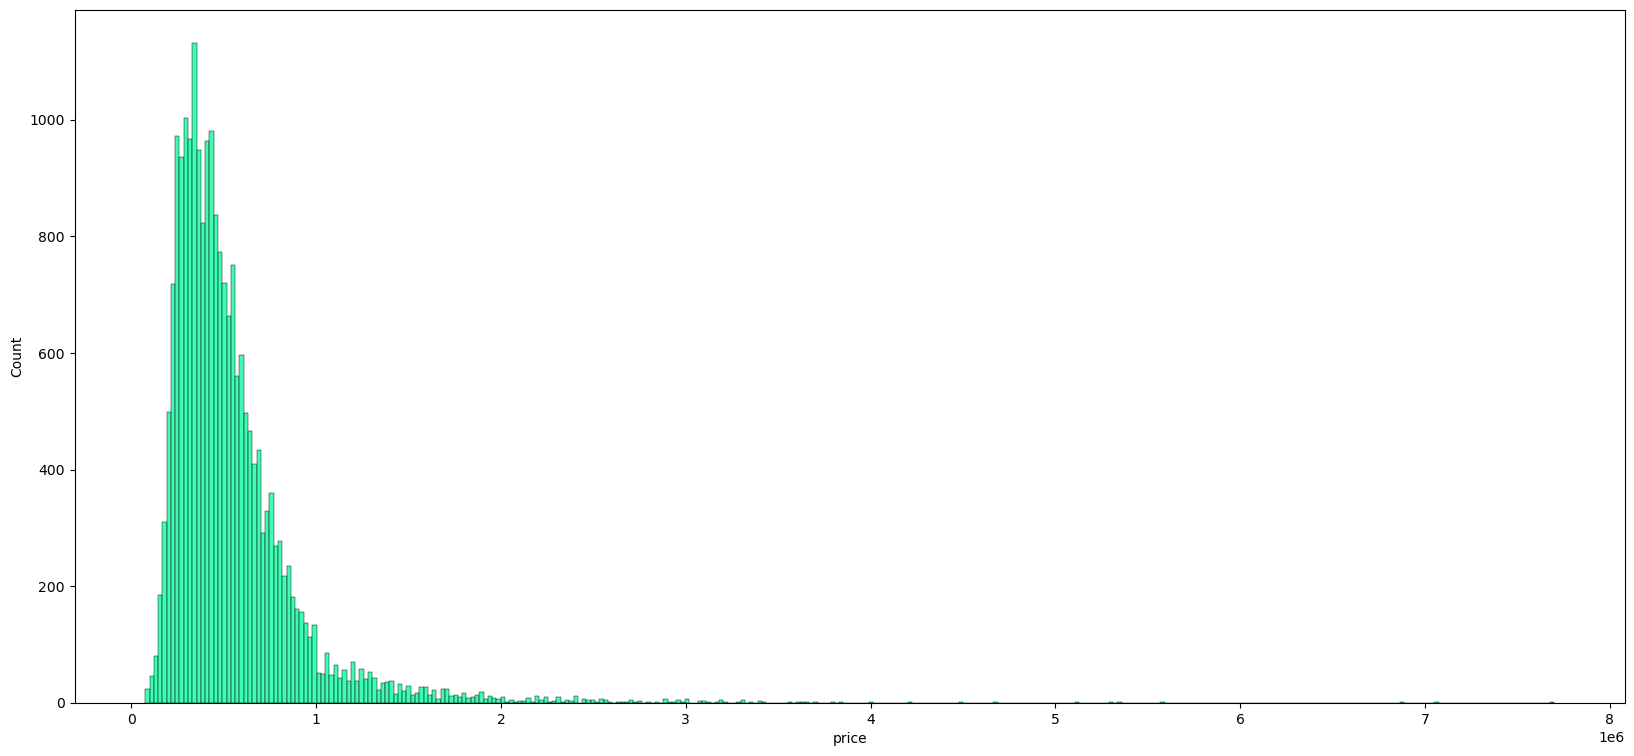

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


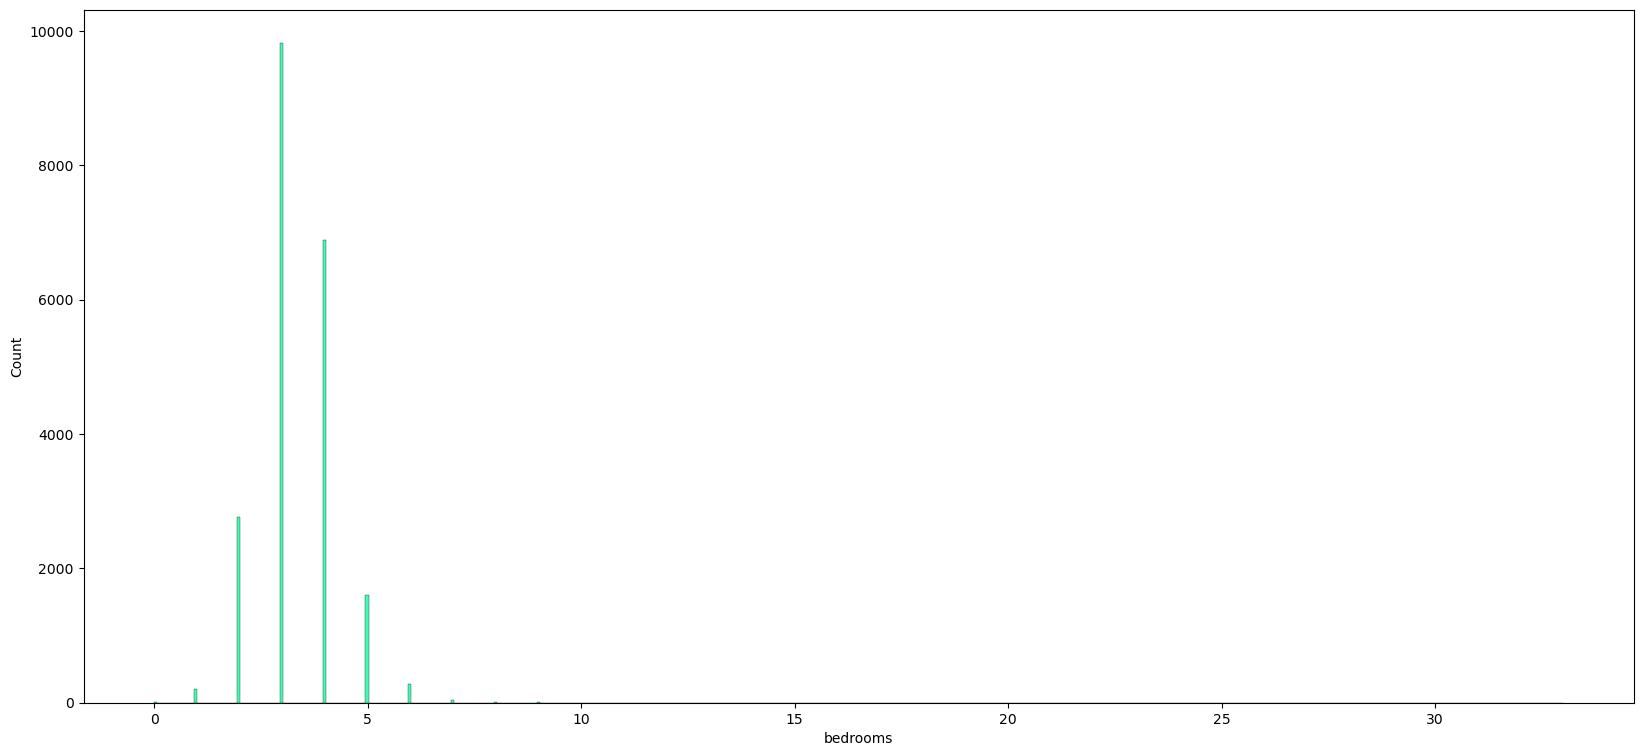

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


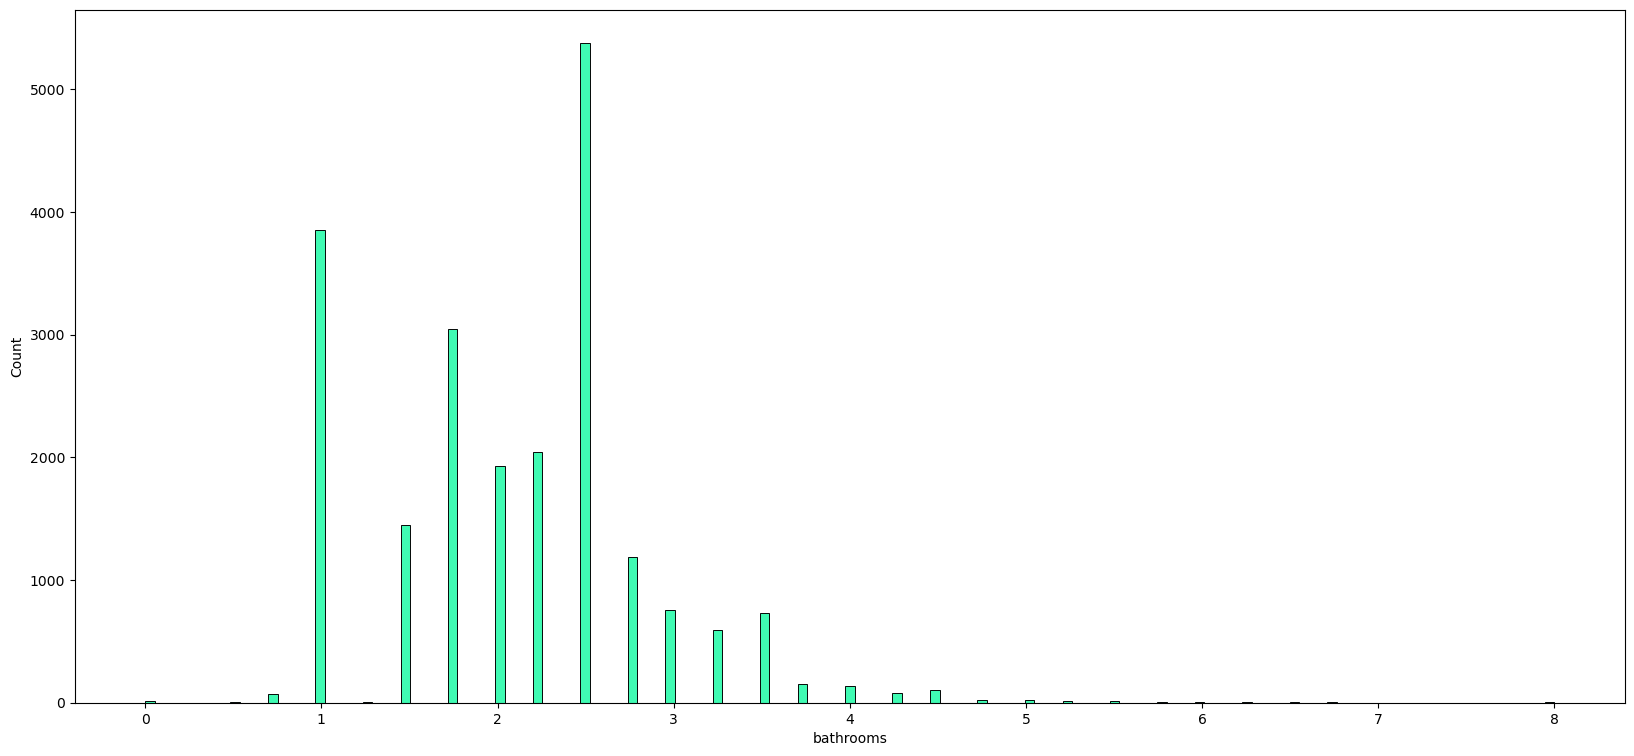

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


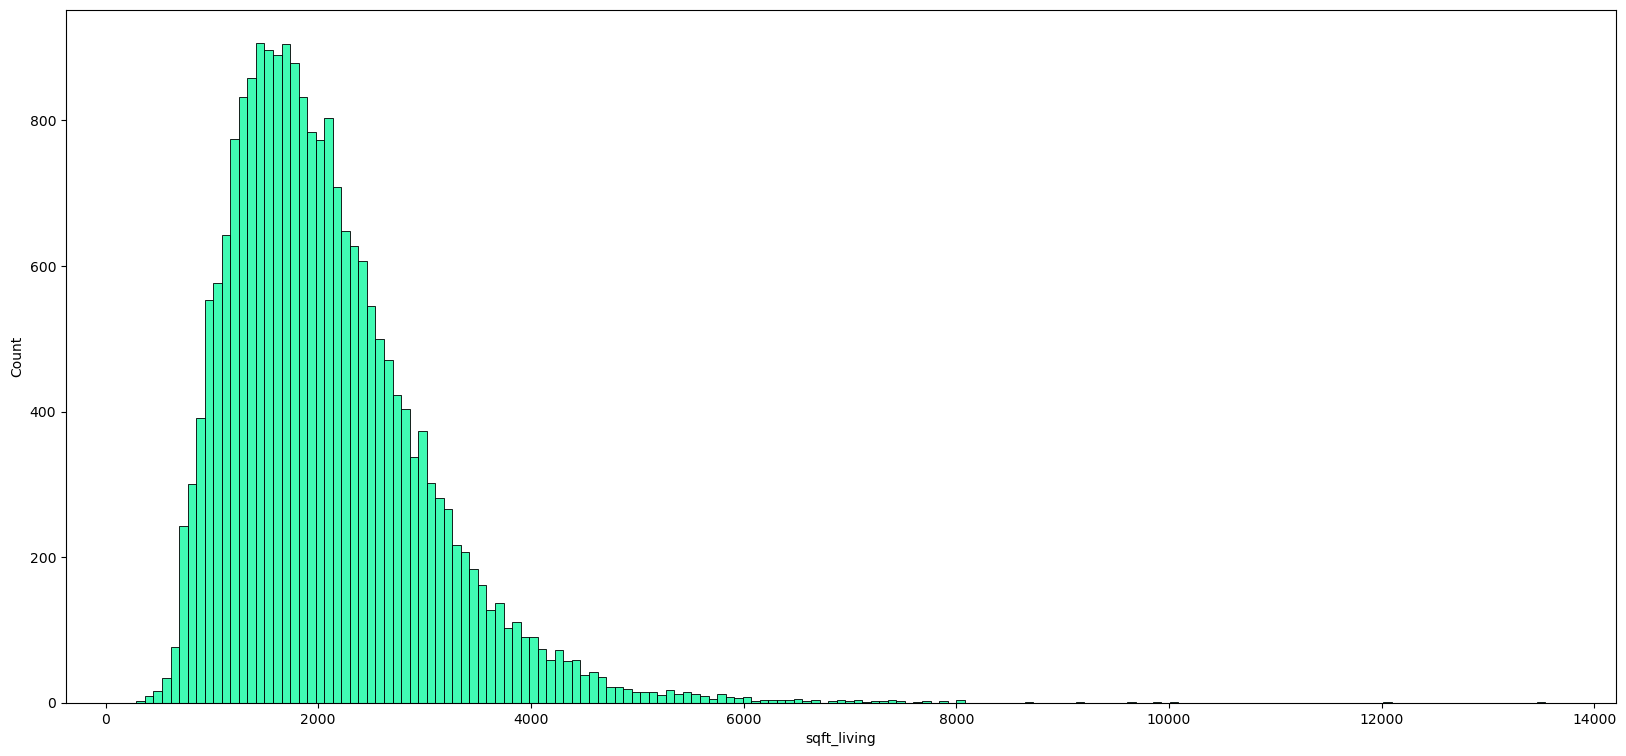

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


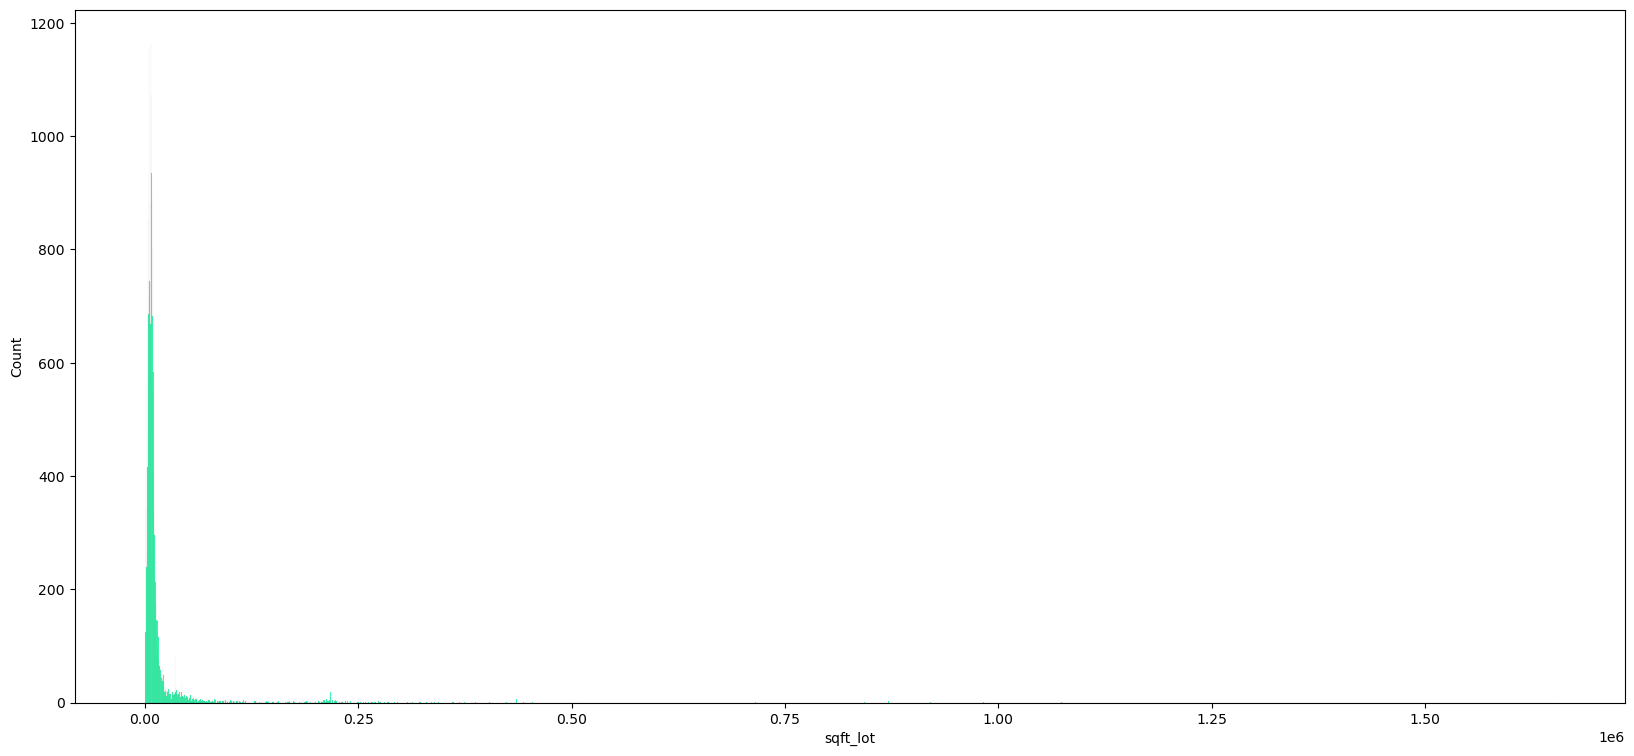

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


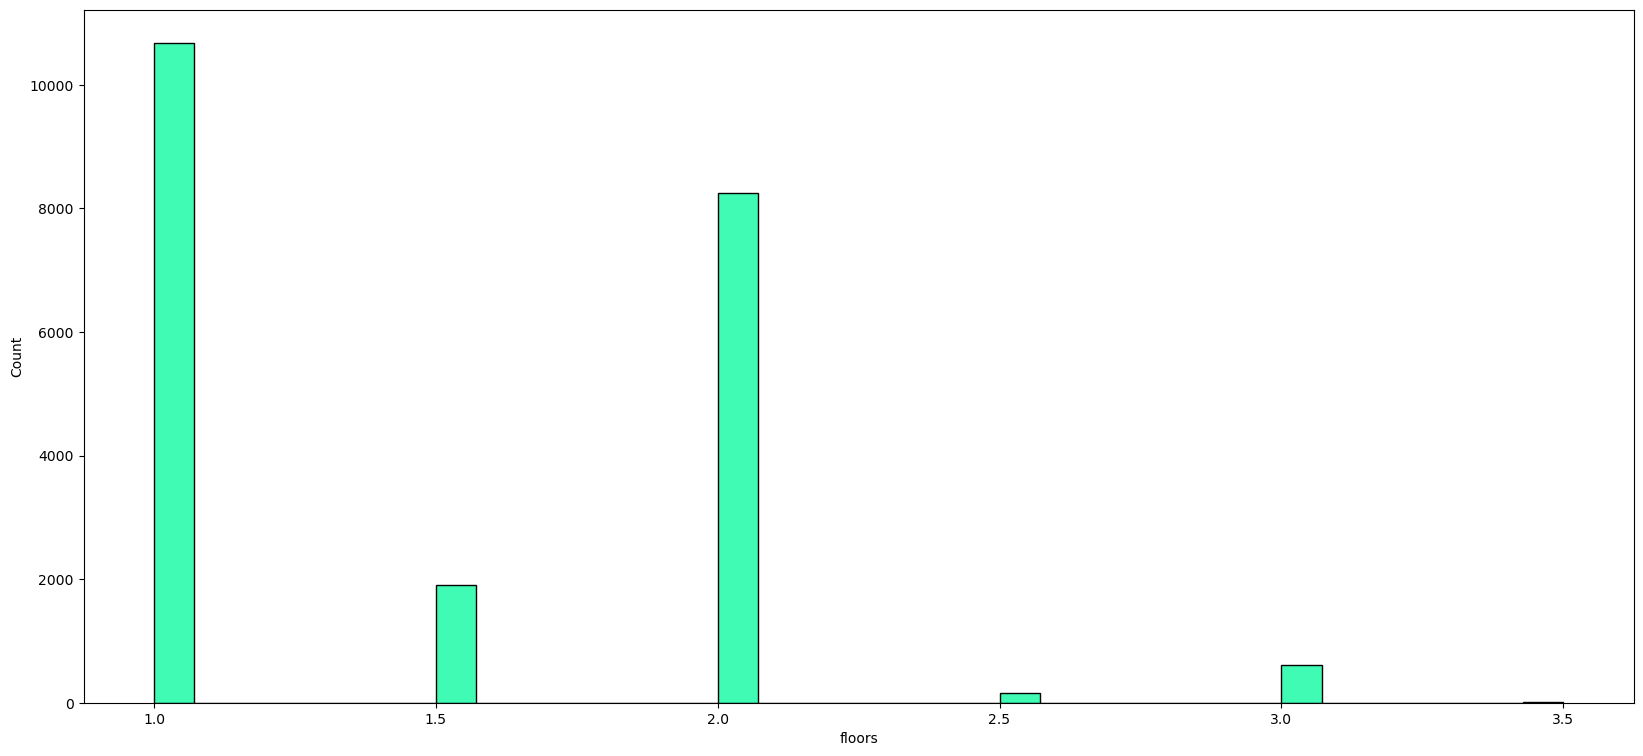

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


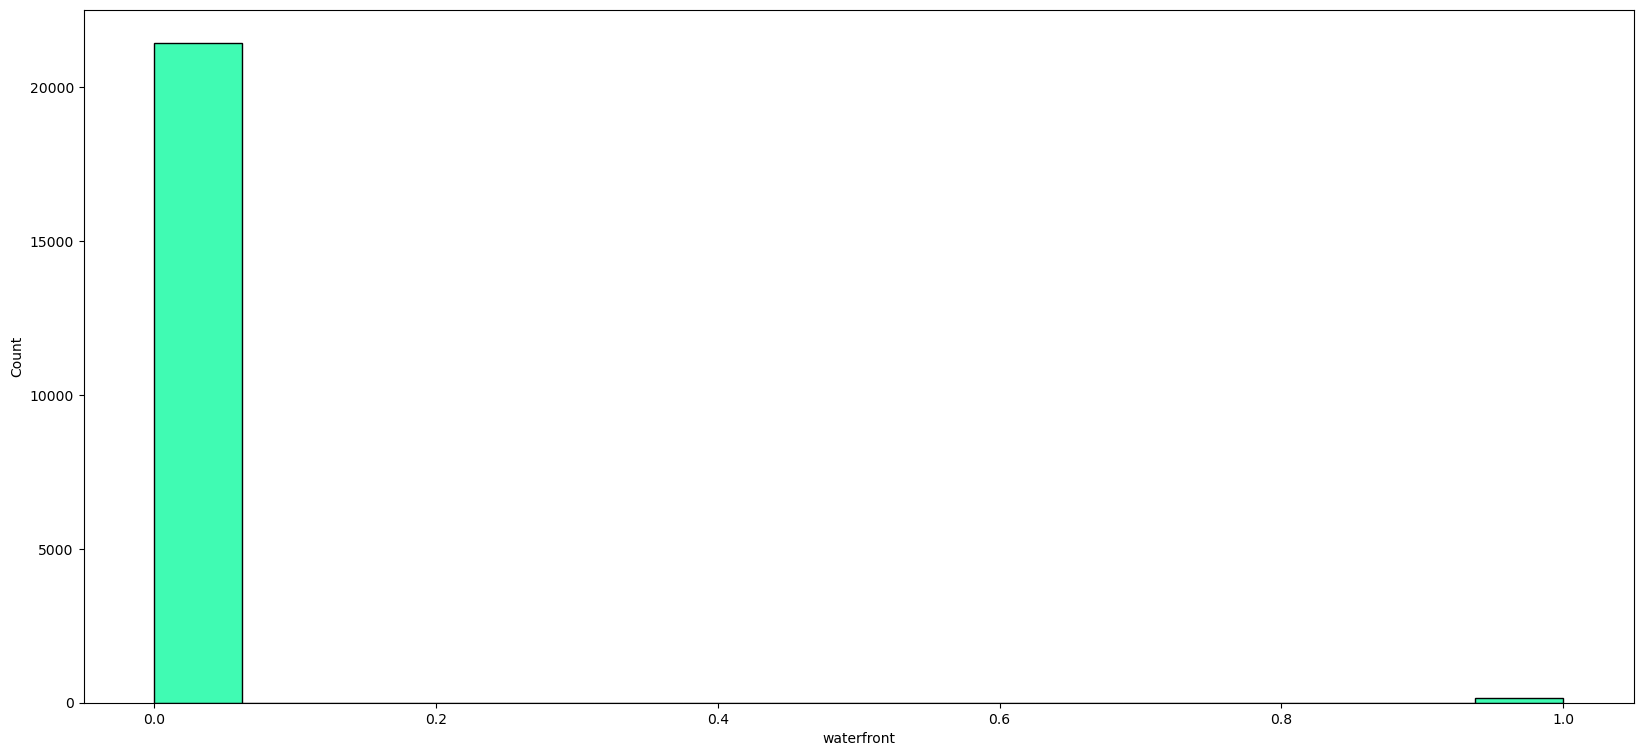

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


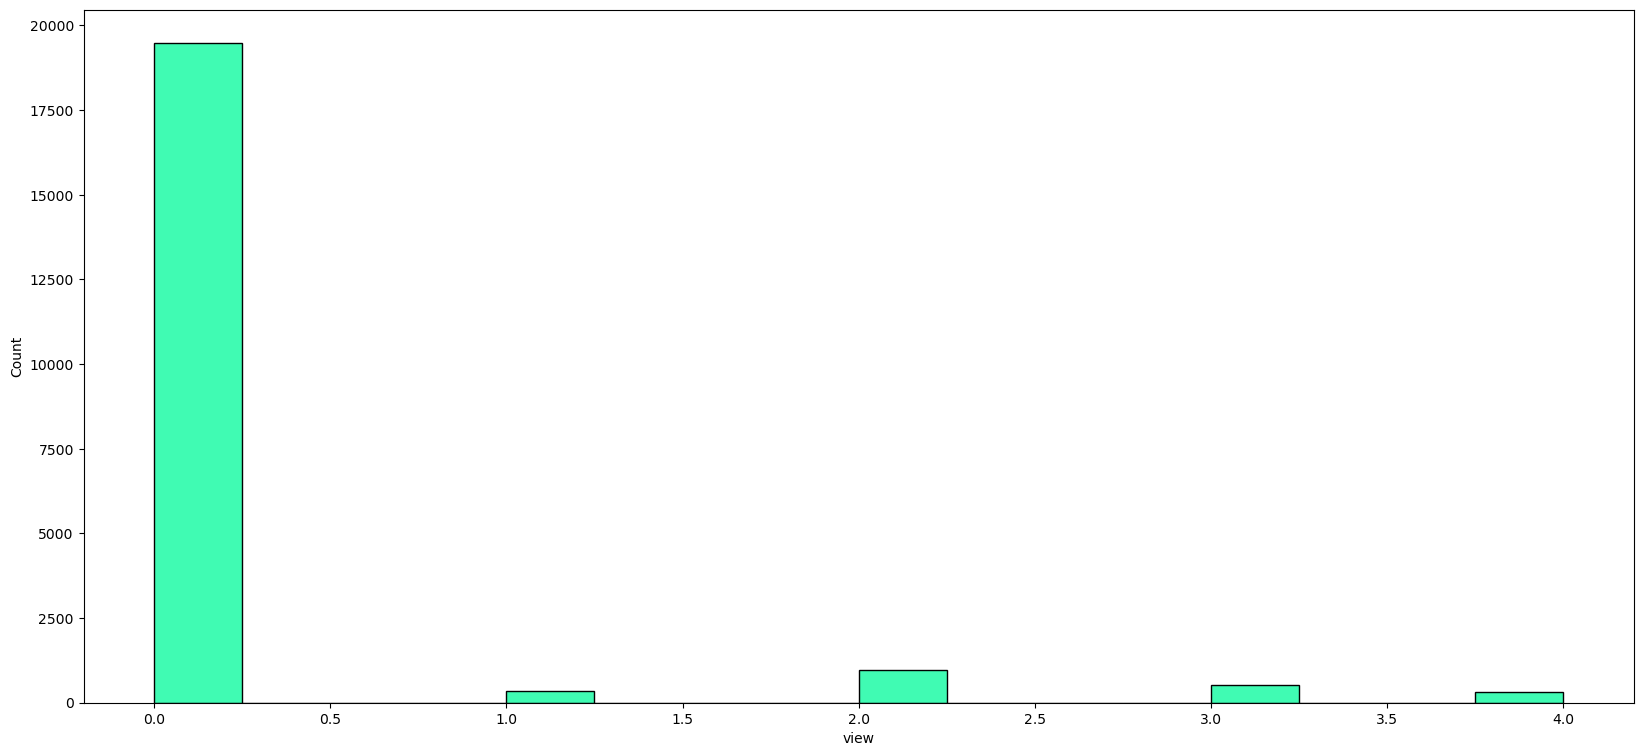

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


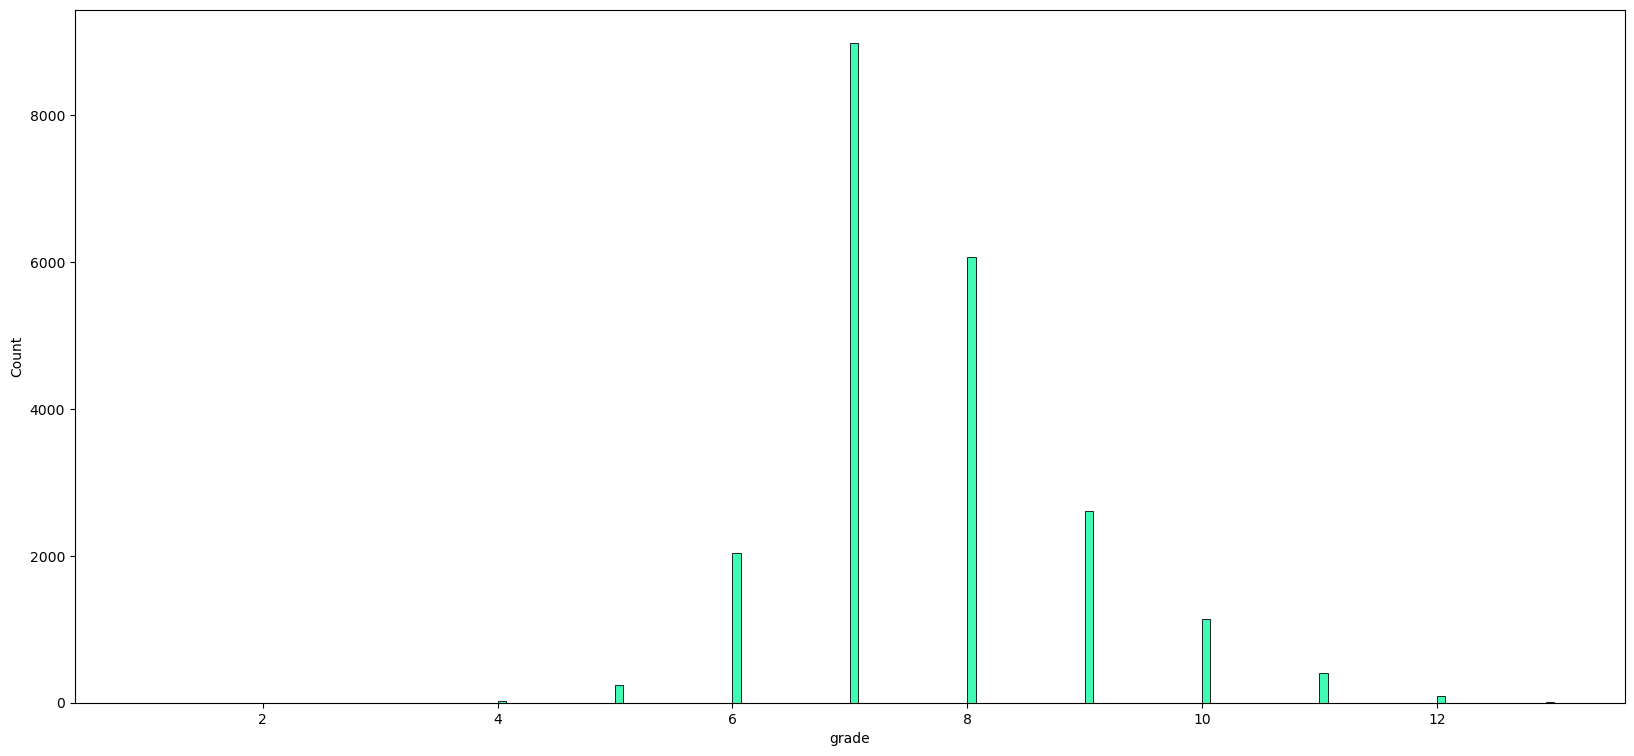

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


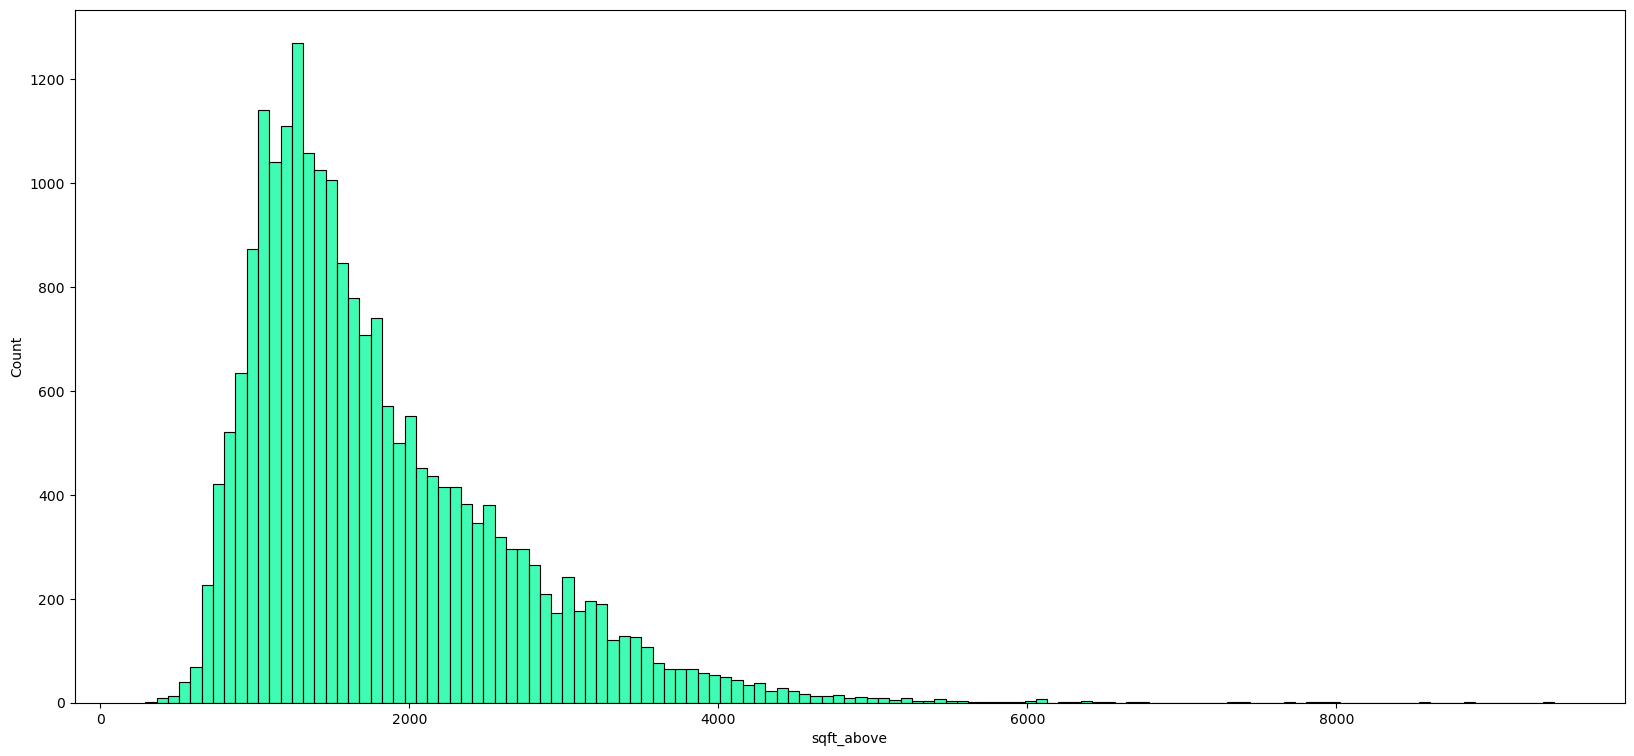

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


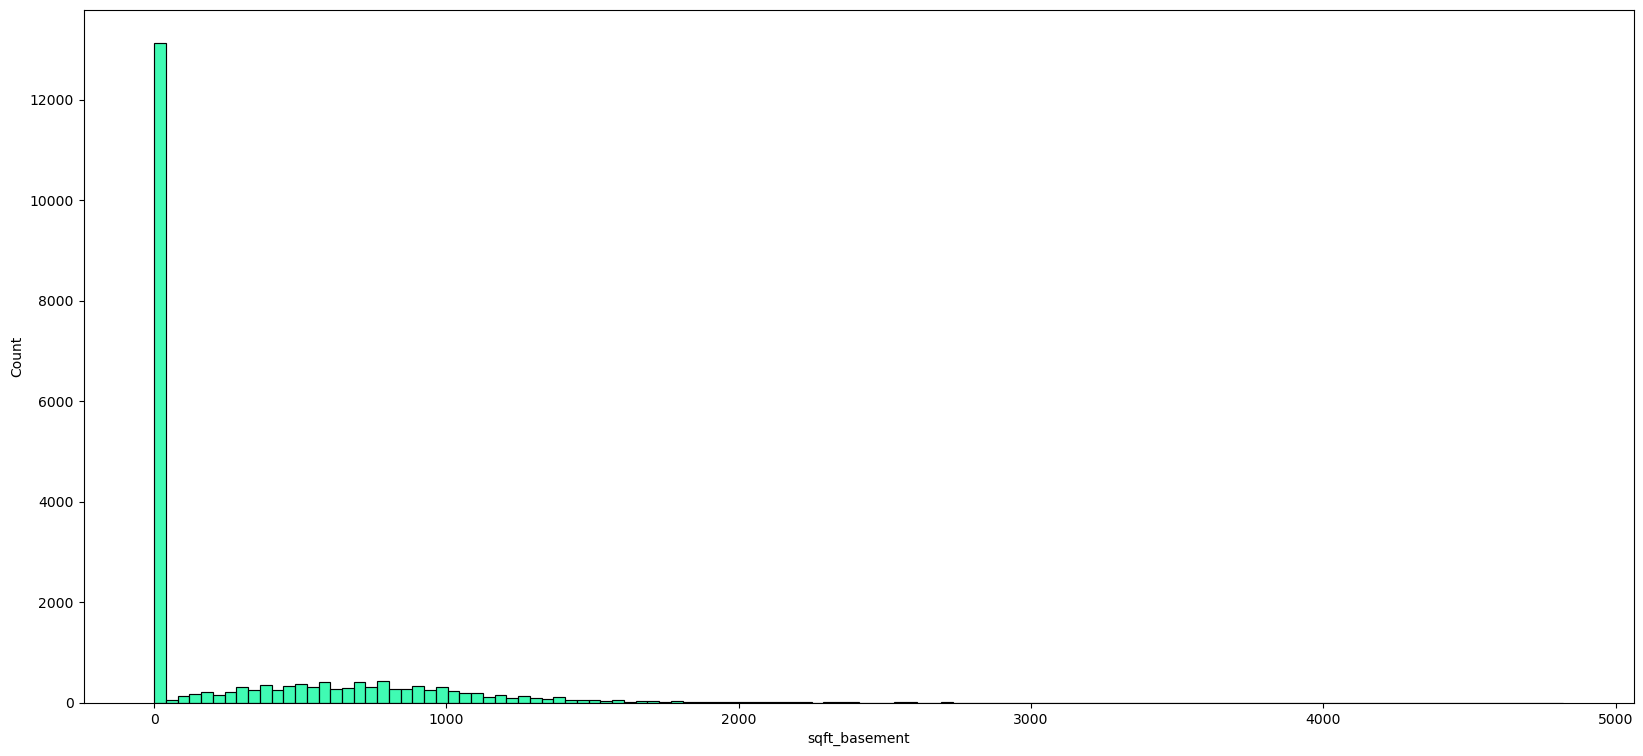

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


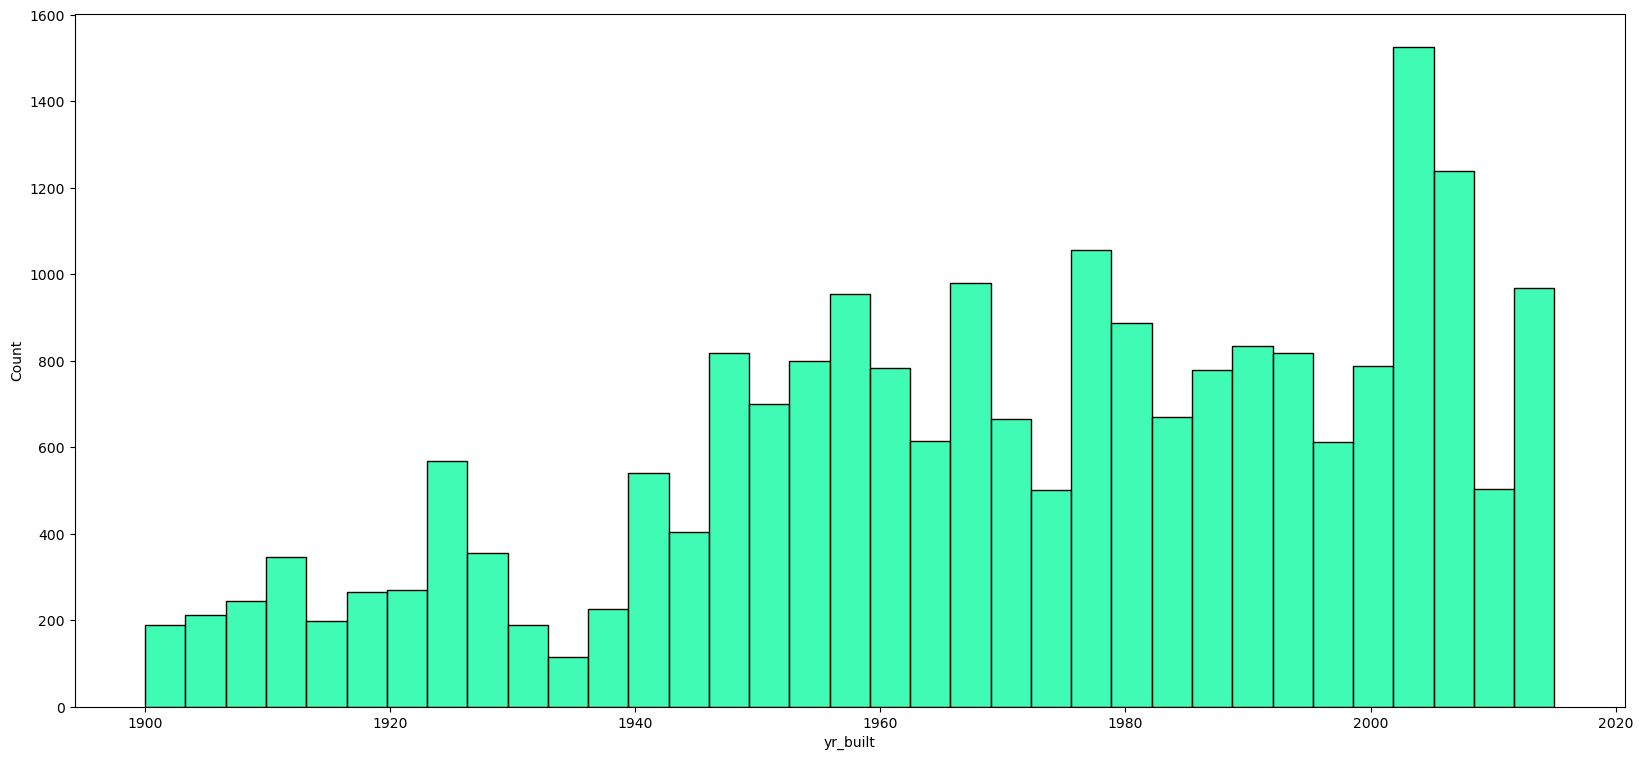

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


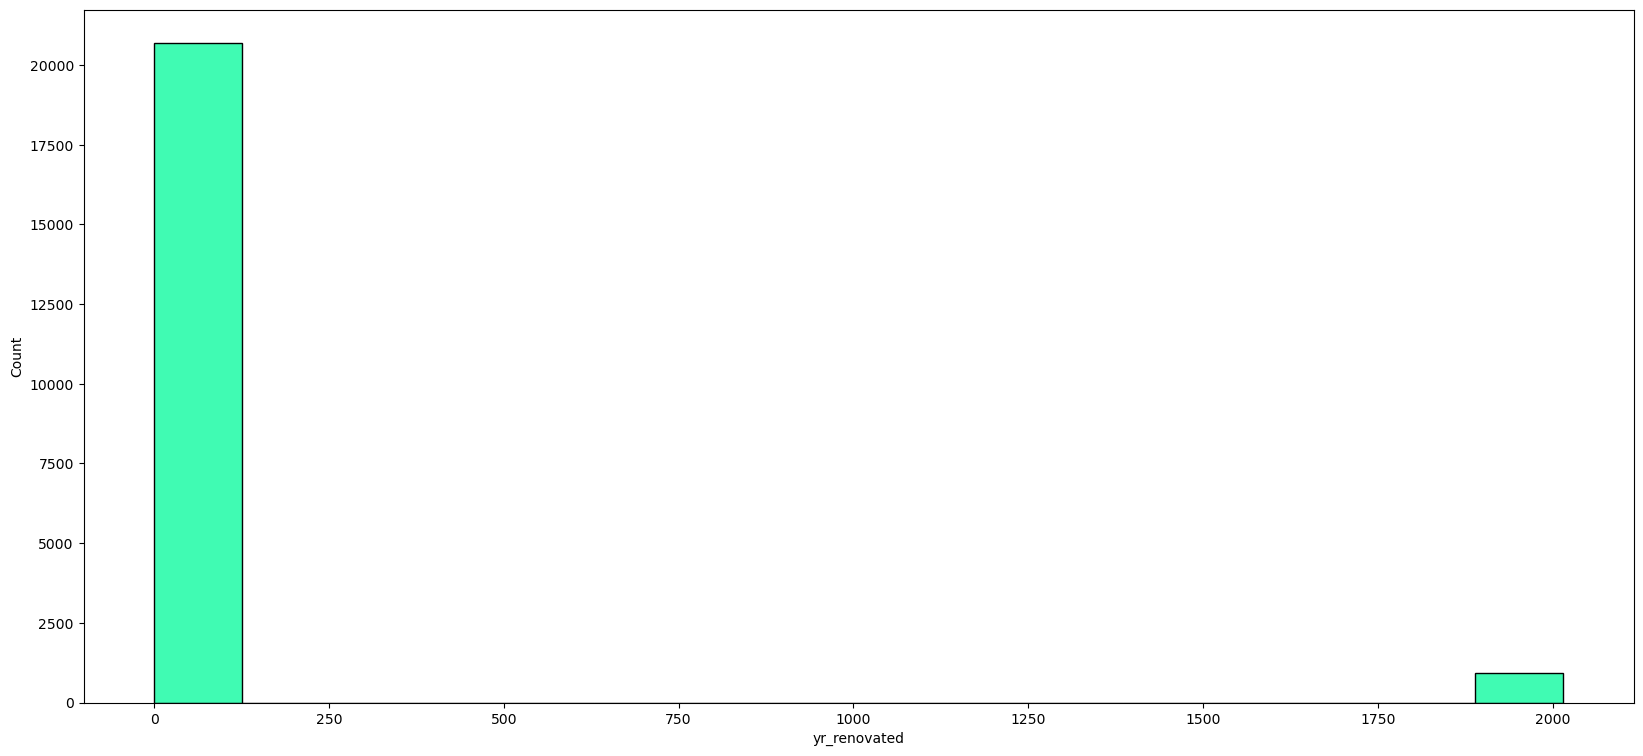

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


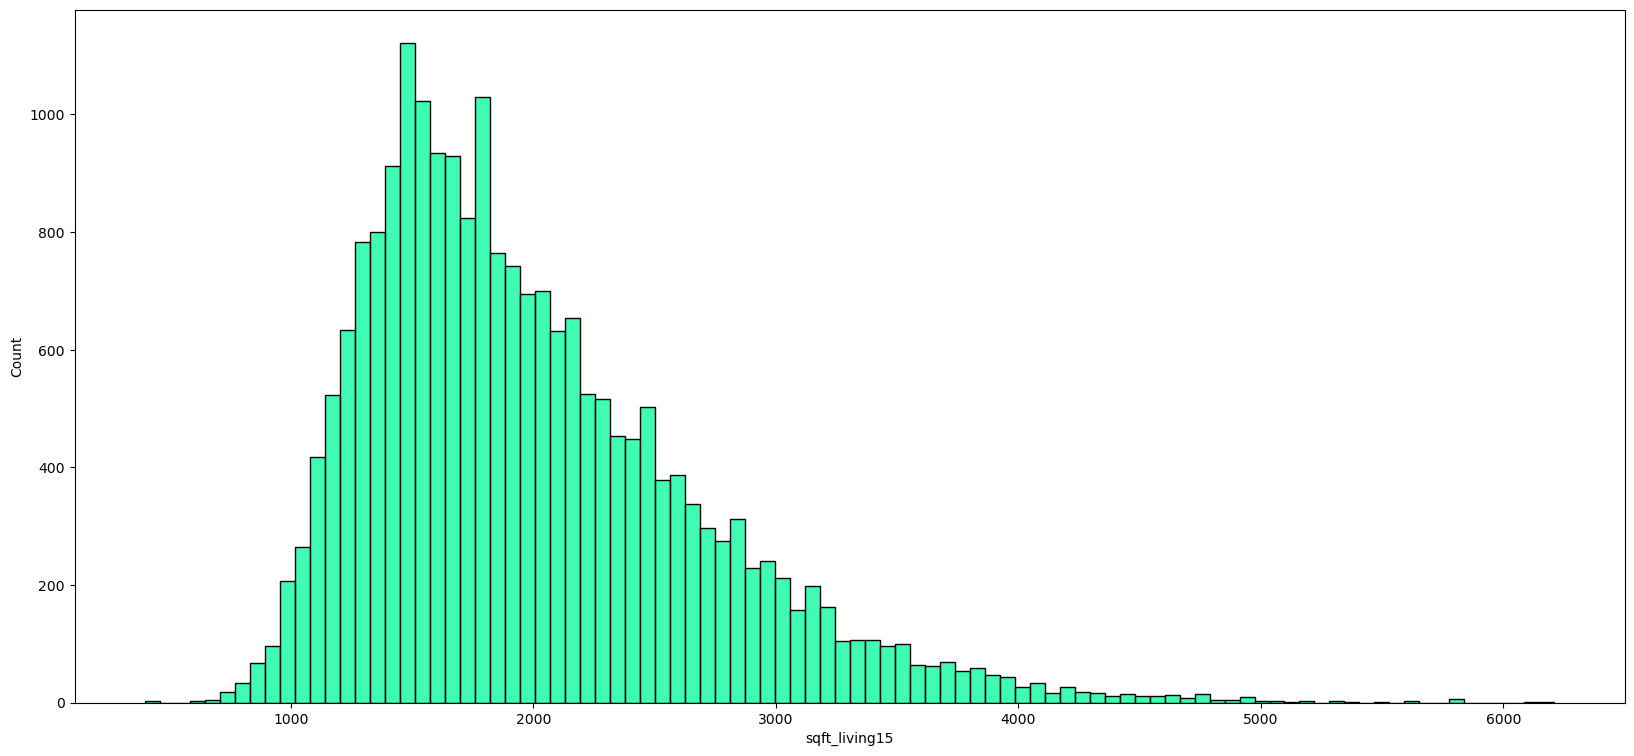

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


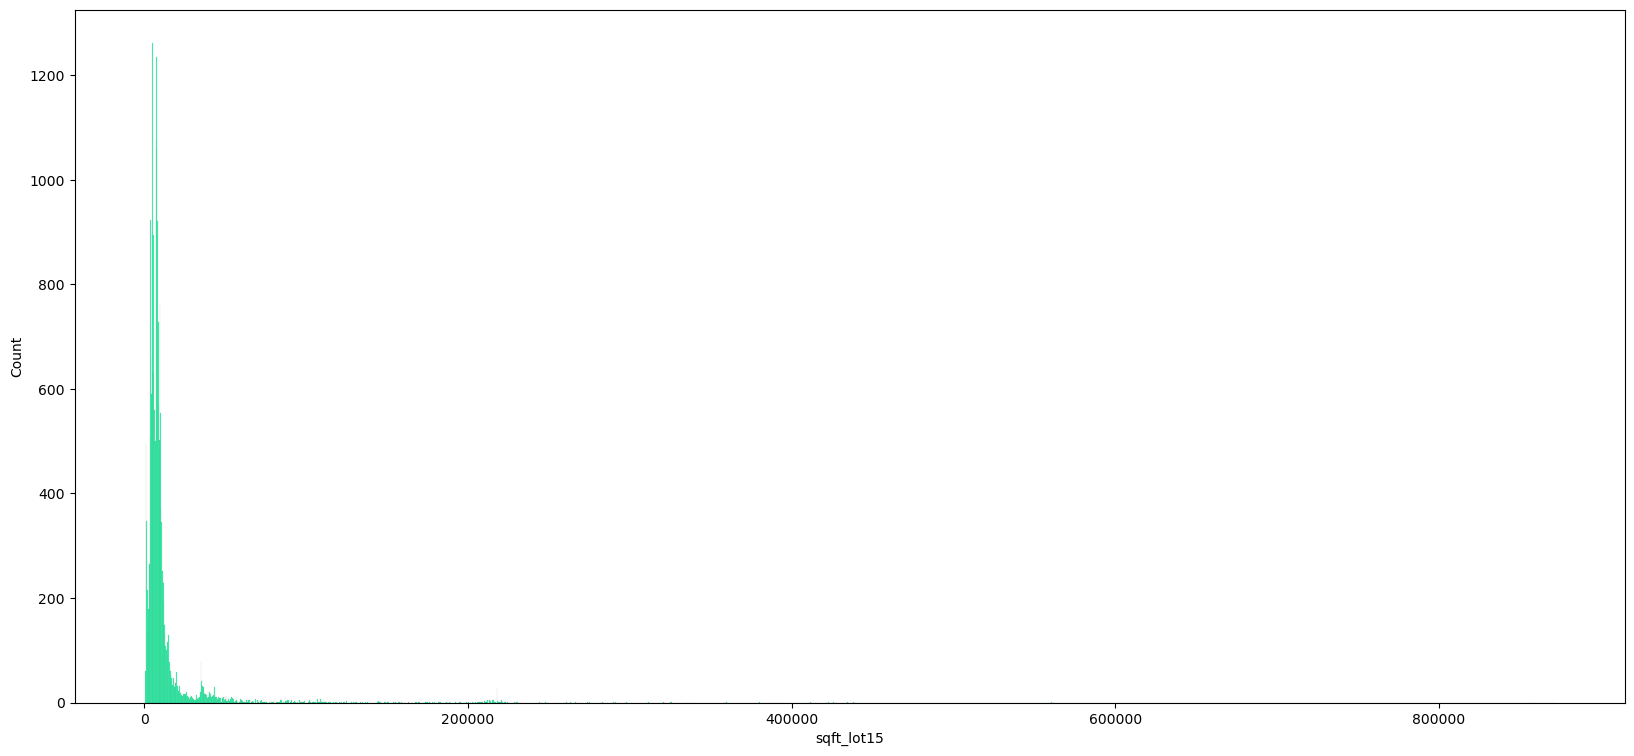

In [29]:
for col in data.columns:
    plt.figure(figsize=(20,9))
    sns.histplot(data[col], color="mediumspringgreen")
    plt.show()

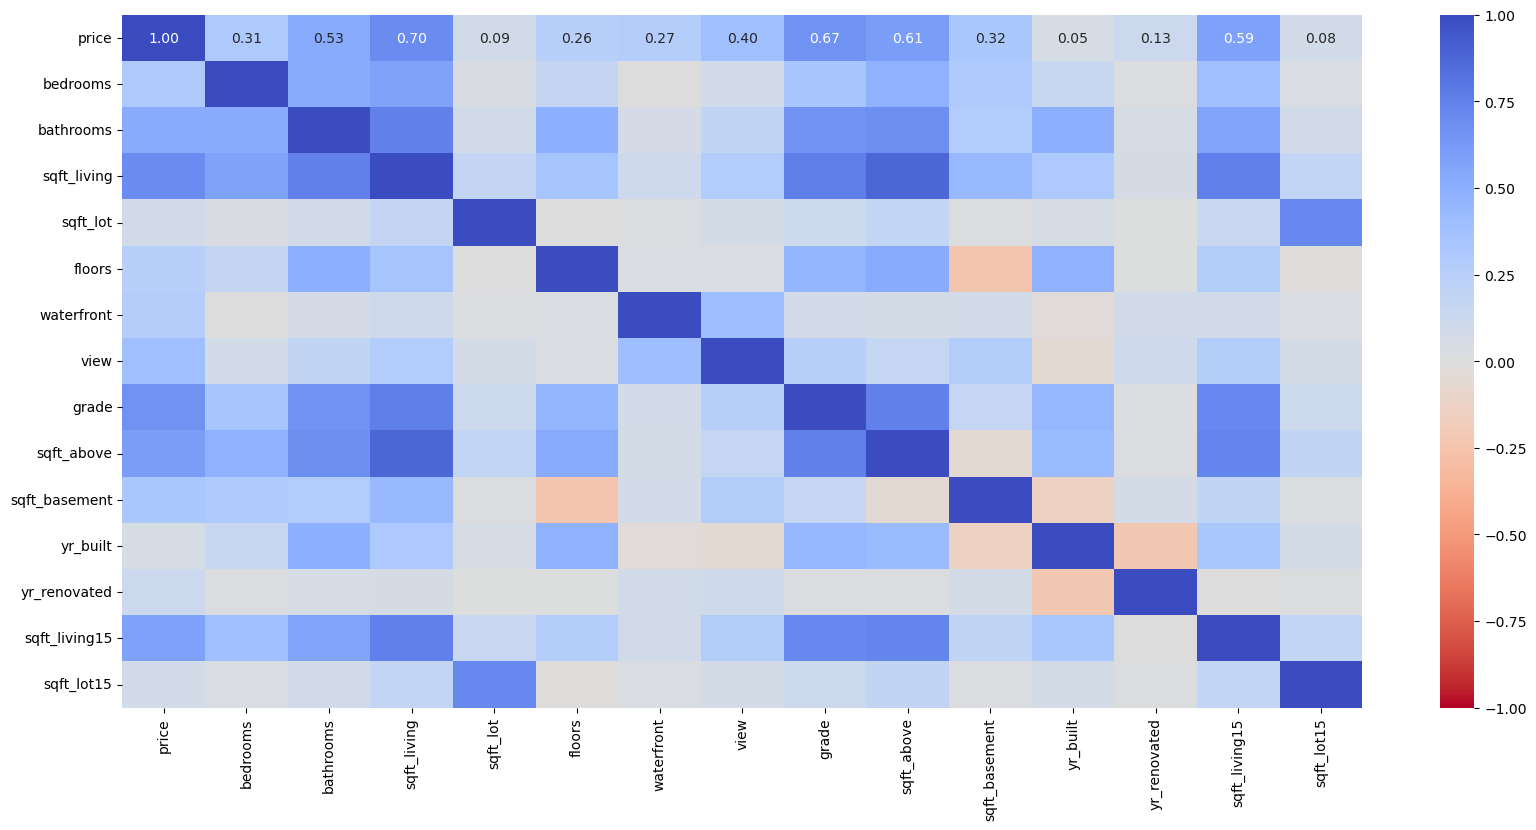

In [30]:
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), cmap="coolwarm_r", vmin=-1, annot=True, fmt=".2f")
plt.show()

In [31]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.706083,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,0.0,-0.574713,-0.395344
1,0.272404,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.598039,0.714286,-0.521739,1991.0,-0.172414,0.003813
2,-0.835784,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.0,1.011494,0.088702
3,0.476706,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,0.0,-0.500000,1.625000,-0.217391,0.0,-0.551724,-0.525788
4,0.185730,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.0,-0.045977,-0.023480


### Visualization through Dimensionality Reduction

PCA<br/>
TSNE<br/>
UMAP<br/>

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

pca_data

array([[-8.44033317e+01, -2.25648903e+00],
       [ 1.90659726e+03, -2.08717081e+00],
       [-8.44032019e+01, -1.36355909e+00],
       ...,
       [-8.44038363e+01, -3.30170042e+00],
       [-8.44033185e+01, -3.15131769e+00],
       [-8.44039347e+01, -3.41779928e+00]])

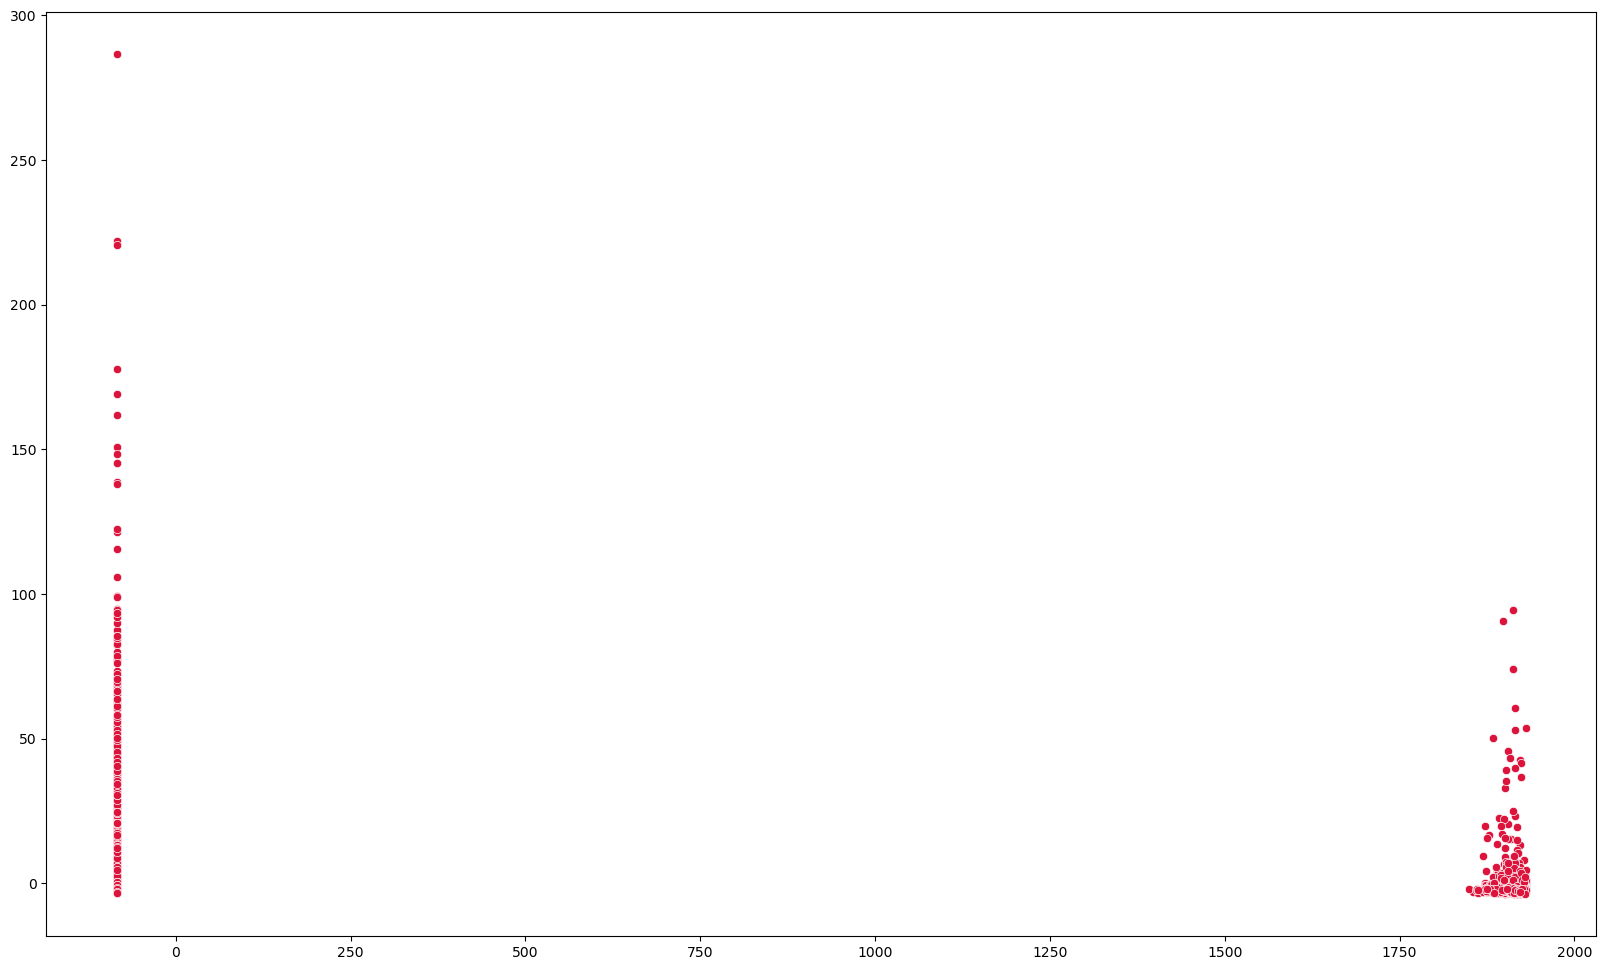

In [33]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], color='crimson')
plt.show()

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_data = tsne.fit_transform(data)

TSNE 하는데 조금 걸림

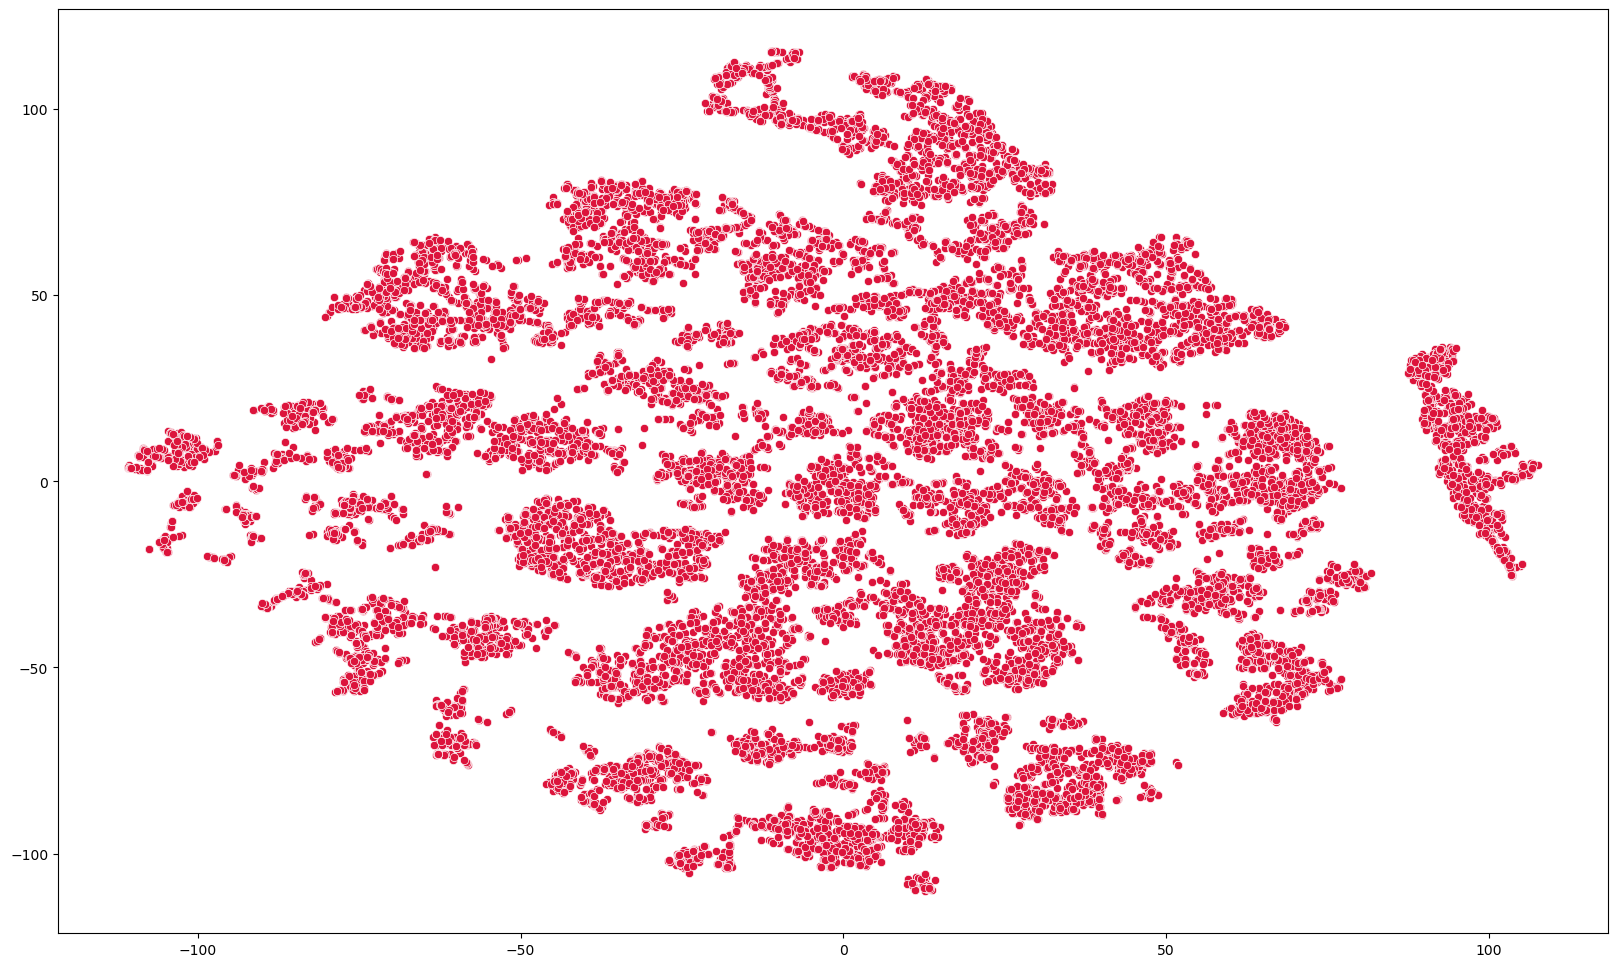

In [17]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], color="crimson")
plt.show()

In [44]:
import umap

umap = umap.UMAP(random_state=42)
embedding = umap.fit_transform(data)

AttributeError: module 'umap' has no attribute 'UMAP'

In [45]:
!pip install umap-learn

</bbr/>

pip uninstall umap</br>
pip install umap-learn

In [48]:
_umap = umap.UMAP(random_state=42)
embedding = _umap.fit_transform(data)

C:\Users\wogus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


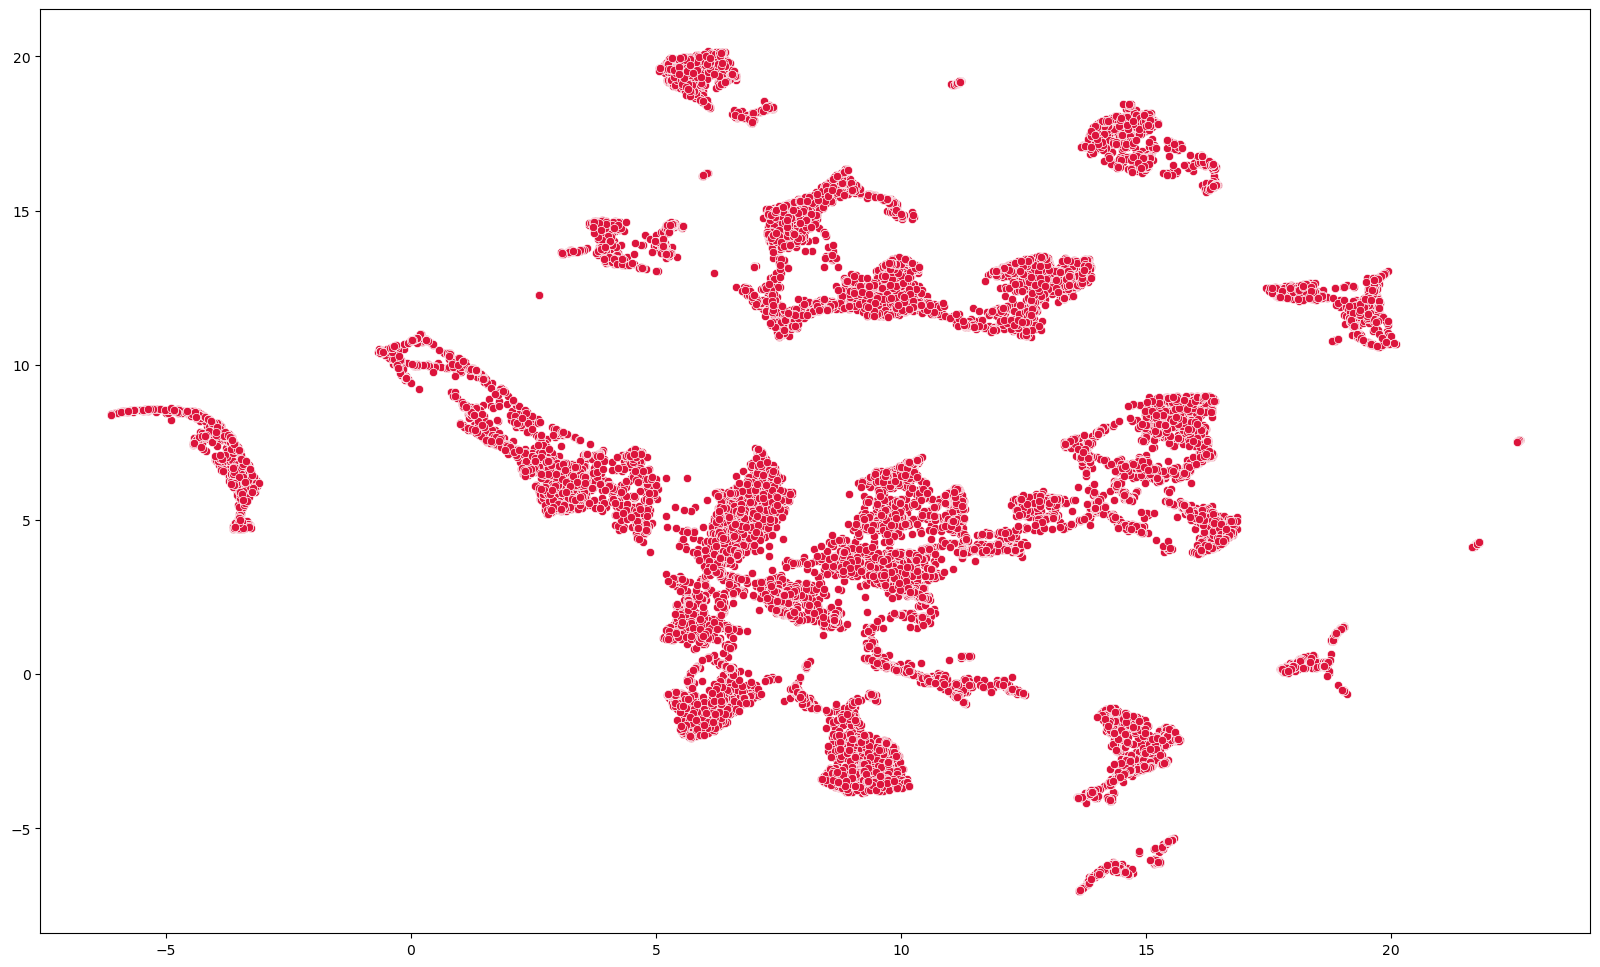

In [49]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], color="crimson")
plt.show()

In [50]:
from sklearn.cluster import DBSCAN

In [56]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.706083,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,0.0,-0.574713,-0.395344
1,0.272404,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.598039,0.714286,-0.521739,1991.0,-0.172414,0.003813
2,-0.835784,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.0,1.011494,0.088702
3,0.476706,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,0.0,-0.500000,1.625000,-0.217391,0.0,-0.551724,-0.525788
4,0.185730,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.0,-0.045977,-0.023480


In [60]:
dbscan = DBSCAN(eps=1.2, min_samples=50).fit(data)

In [61]:
dbscan.labels_

array([ 0, -1,  0, ...,  0,  0,  0], dtype=int64)

In [62]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1], dtype=int64)

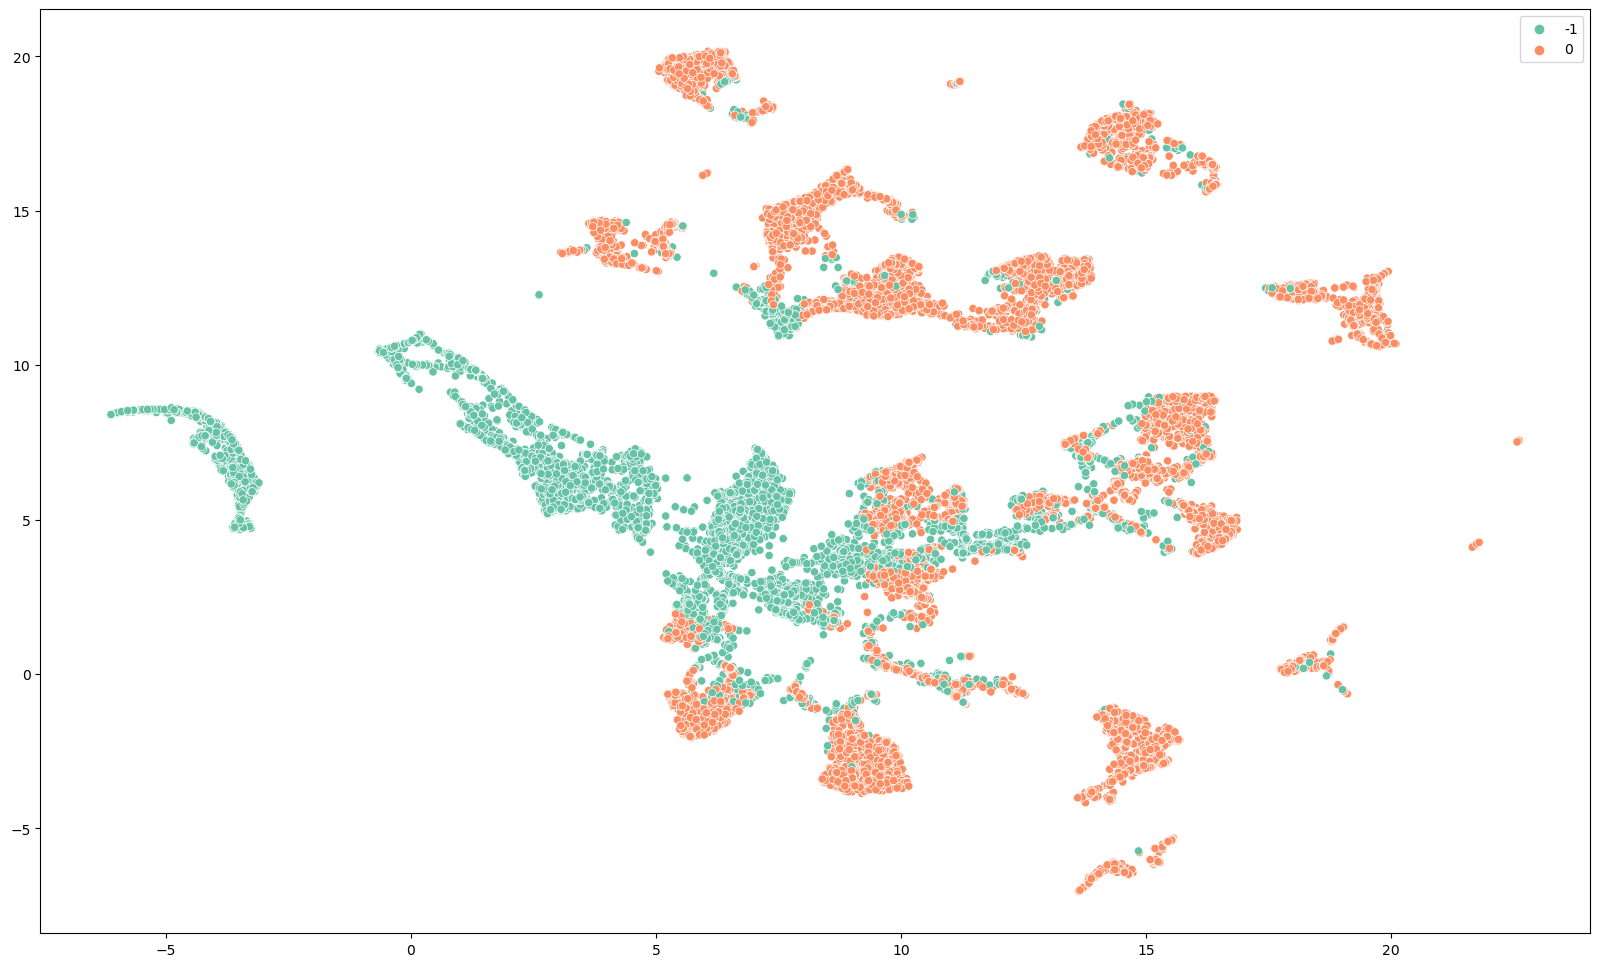

In [53]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="Set2")
plt.show()

In [63]:
dbscan = DBSCAN(0.6, min_samples=55).fit(embedding)

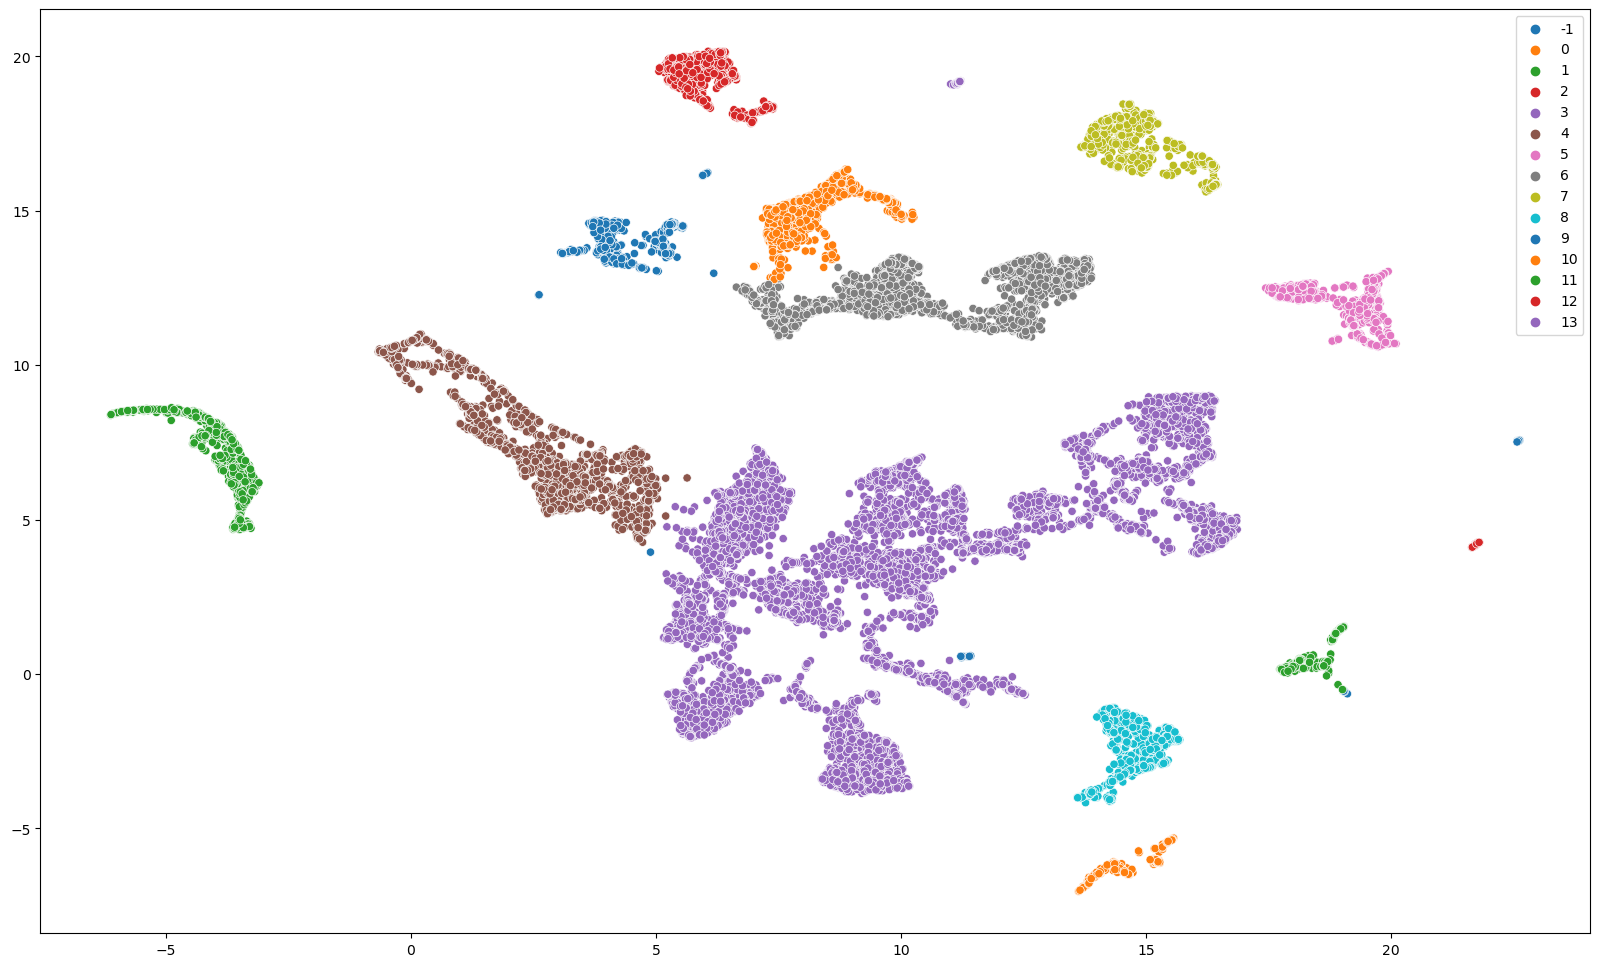

In [64]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()

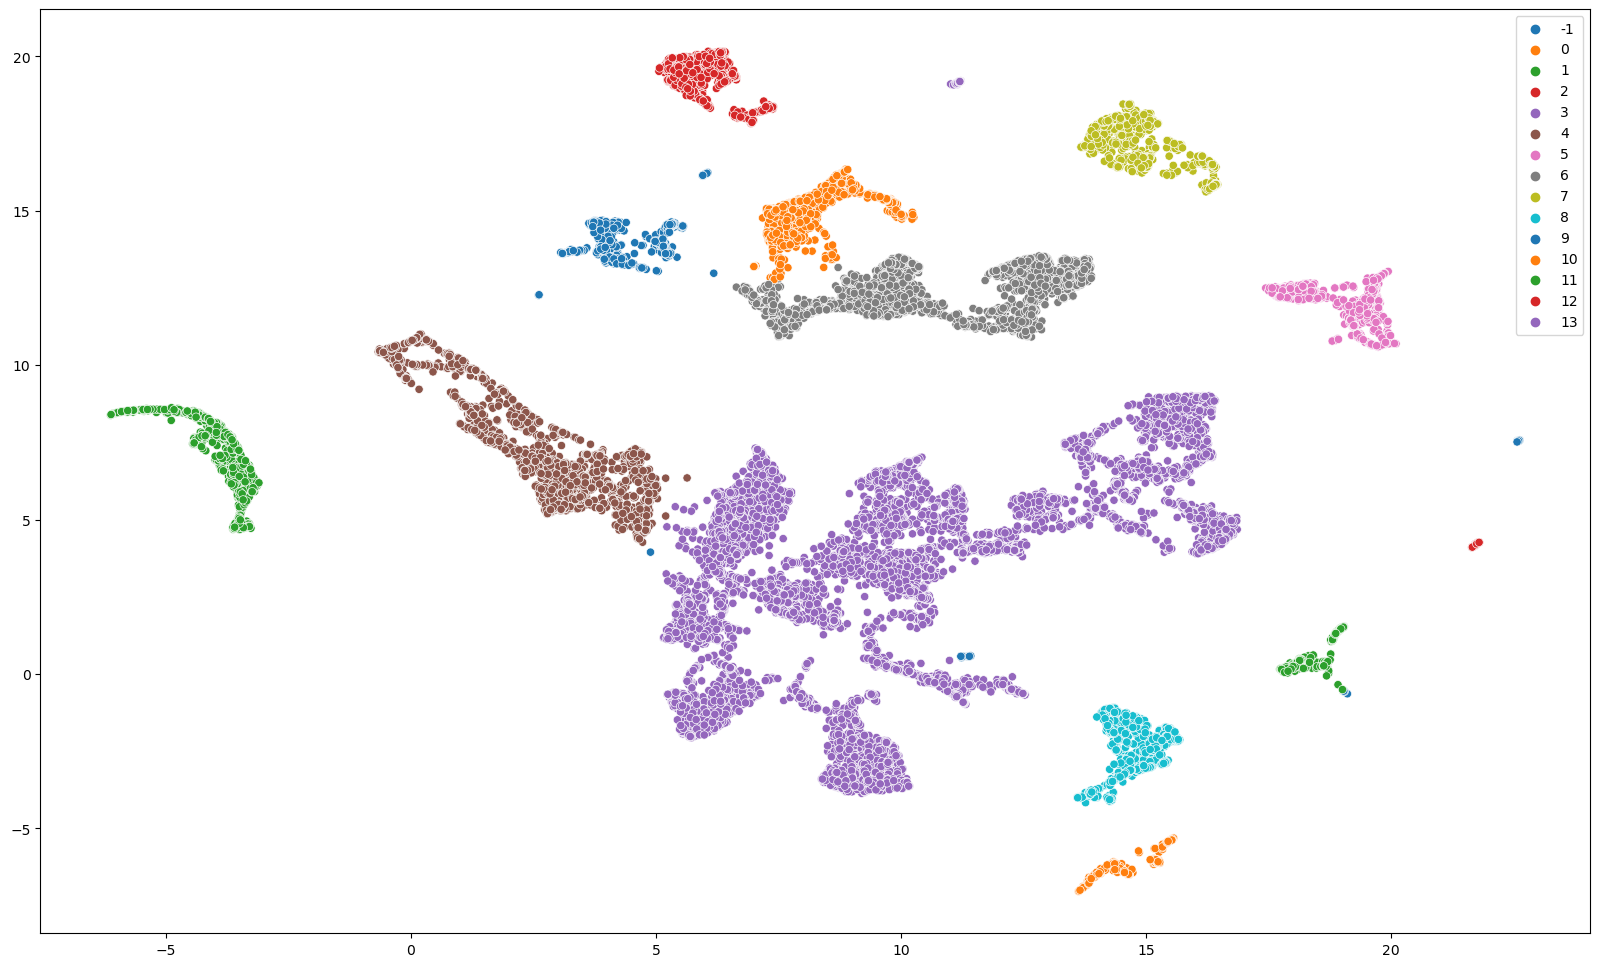

In [65]:
dbscan = DBSCAN(0.6, min_samples=55).fit(embedding)
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()